**Name:** Rishabh Roy

**Phone:** 9111717731

**Email:** rishabh25126@gmail.com

# Task 3 - To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


## Import all the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get the data

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rishabh25126/TheSparkFoundation-DA-ML/master/datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Explore the data

Shape of the data

In [3]:
df.shape

(150, 6)

Our data contains 150 rows and 6 columns Let's get the name of the columns

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Pandas .info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the .info() function.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Let's see what are the Species of flowers we are dealing with using ***.unique()***

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

To see the quantity of the species in the dataset just use .value_counts()

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Visualize the data
Lets visualise the dataset we have been provided...



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


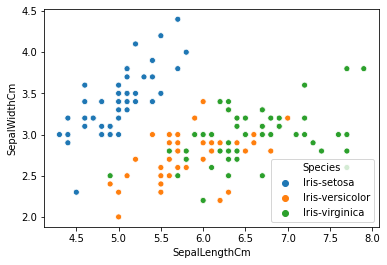

In [8]:
import seaborn as sns
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue="Species")

## Cleaning the data
Let's check if out data has any null values.

In [9]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Oh, our data has no null values.

Its a good practice to create a copy of our dataframe to go some computational work

In [10]:
df1 = df.copy()

# K-Means Clustering
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

K-means looks for a fixed number (k) of clusters in a dataset.

## Prepare Data for ML model

making a input metrics of features 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'.

In [11]:
input = df1[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

K-Means clusturing can be found in SciKit-Learn package... Lets import it..

In [12]:
from sklearn.cluster import KMeans

Initialize out K-Means class in scikit-learn...

I have given two paramenters.. 

  ***n_clusters***, int default=8
    The number of clusters to form as well as the number of centroids to generate.

  ***random_state***, int, RandomState instance, default=None
    Determines random number generation for centroid initialization. Use an int 
    anto make the randomness deterministic. 

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0)

its time to train our model by feeding the input metrics and predict the outcome.

In [14]:
pred = kmeans.fit_predict(input)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Creating a new dataframe from the input and pred metrices.

In [15]:
final_df = pd.DataFrame(input, columns=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
final_df["Species"] = pred.reshape(-1,1)
final_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,1
1,2.0,4.9,3.0,1.4,0.2,1
2,3.0,4.7,3.2,1.3,0.2,1
3,4.0,4.6,3.1,1.5,0.2,1
4,5.0,5.0,3.6,1.4,0.2,1


Lets Visualize how out model classified 3 Species of the flowers.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


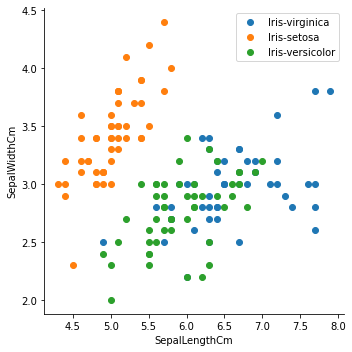

In [16]:
import seaborn as sns
%matplotlib inline
plot = sns.FacetGrid(final_df,hue='Species',height=5)\
  .map(plt.scatter,'SepalLengthCm','SepalWidthCm')
plt.legend("Flowers Species", labels=['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])
plt.show(plot)